**A- Importing the libraries**

In [ ]:
# We will add comments explaining some of the codes (their functions) in the project:

# Libraries for numerical computations and data manipulation
import numpy as np  # For numerical computations and array manipulation
import pandas as pd  # For tabular data manipulation and analysis

# Libraries for visualization
import matplotlib.pyplot as plt  # For creating plots (e.g., line, scatter, bar)
import seaborn as sns  # For advanced visualizations like heatmaps and pairplots

# For dataset splitting and preprocessing
from sklearn.model_selection import train_test_split  # Splits data into training and testing subsets
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels into numerical format

# Basic evaluation metric
from sklearn.metrics import accuracy_score  # Calculates the proportion of correct predictions

# Advanced evaluation metrics for multi-class classification
from sklearn.metrics import classification_report  # Generates detailed metrics for each class
from sklearn.metrics import confusion_matrix  # Creates a matrix of true vs. predicted class counts
from sklearn.metrics import roc_auc_score  # Calculates the area under the ROC curve
from sklearn.metrics import f1_score  # Combines precision and recall into a single metric
from sklearn.metrics import precision_score  # Measures the proportion of correct positive predictions
from sklearn.metrics import recall_score  # Measures the proportion of actual positives correctly predicted
from sklearn.metrics import log_loss  # Evaluates predicted probabilities against actual labels

# Libraries for model building
from sklearn.ensemble import RandomForestClassifier  # An ensemble method using decision trees for classification
from sklearn.svm import SVC  # Support Vector Classifier for handling high-dimensional data


**B- EDA**

1- Load the data sets:

In [ ]:
#Load datasets and check their info (types,missing values,etc), and describe (mean,etc)
dataset1 = pd.read_excel('/content/topic1-learningStyles (1).xlsx')
dataset2 = pd.read_csv('/content/topic2-engagement&timeManagement (4).csv')
dataset3 = pd.read_excel('/content/topic3-knowledgeRetention.xlsx')
dataset4 = pd.read_excel('/content/topic4.xlsx')
dataset5 = pd.read_excel('/content/topic5.xlsx')
dataset6 = pd.read_excel('/content/topic6.xlsx')

print(dataset1.head())
print(dataset2.head())
print(dataset3.head())
print(dataset4.head())
print(dataset5.head())
print(dataset6.head())

print("Dataset 1 Info:")
print(dataset1.info())
print(dataset1.describe())

print("\nDataset 2 Info:")
print(dataset2.info())
print(dataset2.describe())

print("\nDataset 3 Info:")
print(dataset3.info())
print(dataset3.describe())

print("\nDataset 4 Info:")
print(dataset4.info())
print(dataset4.describe())

print("\nDataset 5 Info:")
print(dataset5.info())
print(dataset5.describe())

print("\nDataset 6 Info:")
print(dataset6.info())
print(dataset6.describe())


  Student ID Visual Learner (Y/N) Auditory Learner (Y/N)  \
0       S001                    Y                      Y   
1       S002                    Y                      Y   
2       S003                    Y                      Y   
3       S004                    Y                      Y   
4       S005                    Y                      N   

  Kinesthetic Learner (Y/N) Read/Write Learner (Y/N)  Preferred Materials  
0                         N                        N                Notes  
1                         N                        N  Hands-on Activities  
2                         Y                        N             Podcasts  
3                         Y                        Y                Books  
4                         N                        N                Notes  
      Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0  student000000       143              344             58              0   
1  student000001        70   

2- Find rows and columns Count datasets

In [ ]:
def print_shape(dataset, dataset_name):
    rows, columns = dataset.shape
    print(f"{dataset_name} - Number of rows: {rows}, Number of columns: {columns}")

# Print number of rows and columns for each dataset
print_shape(dataset1, "Dataset 1")
print_shape(dataset2, "Dataset 2")
print_shape(dataset3, "Dataset 3")
print_shape(dataset4, "Dataset 4")
print_shape(dataset5, "Dataset 5")
print_shape(dataset6, "Dataset 6")


Dataset 1 - Number of rows: 500, Number of columns: 6
Dataset 2 - Number of rows: 486, Number of columns: 14
Dataset 3 - Number of rows: 500, Number of columns: 6
Dataset 4 - Number of rows: 500, Number of columns: 7
Dataset 5 - Number of rows: 500, Number of columns: 5
Dataset 6 - Number of rows: 500, Number of columns: 4


3- Clean the datasets

In [ ]:
#Remove outliers, nulls, etc...
# Function to clean a dataset

def clean_data(dataset, dataset_name):
    print(f"Cleaning {dataset_name}...")
    # Remove rows with null values
    cleaned_dataset = dataset.dropna()

    # Handle numeric outliers using the IQR method
    for column in cleaned_dataset.select_dtypes(include=['number']).columns:
        Q1 = cleaned_dataset[column].quantile(0.25)
        Q3 = cleaned_dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_dataset = cleaned_dataset[
            (cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)
        ]

    # Reset index after cleaning
    cleaned_dataset.reset_index(drop=True, inplace=True)

    # Print a summary of cleaning
    print(f"{dataset_name} cleaned: {cleaned_dataset.shape[0]} rows, {cleaned_dataset.shape[1]} columns")
    return cleaned_dataset

# Clean each dataset
dataset1_cleaned = clean_data(dataset1, "Dataset 1")
dataset2_cleaned = clean_data(dataset2, "Dataset 2")
dataset3_cleaned = clean_data(dataset3, "Dataset 3")
dataset4_cleaned = clean_data(dataset4, "Dataset 4")
dataset5_cleaned = clean_data(dataset5, "Dataset 5")
dataset6_cleaned = clean_data(dataset6, "Dataset 6")


Cleaning Dataset 1...
Dataset 1 cleaned: 500 rows, 6 columns
Cleaning Dataset 2...
Dataset 2 cleaned: 351 rows, 14 columns
Cleaning Dataset 3...
Dataset 3 cleaned: 500 rows, 6 columns
Cleaning Dataset 4...
Dataset 4 cleaned: 500 rows, 7 columns
Cleaning Dataset 5...
Dataset 5 cleaned: 500 rows, 5 columns
Cleaning Dataset 6...
Dataset 6 cleaned: 500 rows, 4 columns


4-Handle missing values

In [ ]:
#Filling missing data
# Function to handle missing values in a dataset
def handle_missing_values(dataset, dataset_name):
    print(f"Handling missing values for {dataset_name}...")

    # Fill missing values for numerical columns with the median
    for column in dataset.select_dtypes(include=['number']).columns:
        dataset[column] = dataset[column].fillna(dataset[column].median())

    # Fill missing values for categorical columns with the mode
    for column in dataset.select_dtypes(include=['object', 'category']).columns:
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

    print(f"Missing values handled for {dataset_name}.")
    return dataset

# Handle missing values for each dataset
dataset1 = handle_missing_values(dataset1, "Dataset 1")
dataset2 = handle_missing_values(dataset2, "Dataset 2")
dataset3 = handle_missing_values(dataset3, "Dataset 3")
dataset4 = handle_missing_values(dataset4, "Dataset 4")
dataset5 = handle_missing_values(dataset5, "Dataset 5")
dataset6 = handle_missing_values(dataset6, "Dataset 6")


Handling missing values for Dataset 1...
Missing values handled for Dataset 1.
Handling missing values for Dataset 2...
Missing values handled for Dataset 2.
Handling missing values for Dataset 3...
Missing values handled for Dataset 3.
Handling missing values for Dataset 4...
Missing values handled for Dataset 4.
Handling missing values for Dataset 5...
Missing values handled for Dataset 5.
Handling missing values for Dataset 6...
Missing values handled for Dataset 6.


5- Visualization of the data

Visualizing Dataset 1...
Visualizing Dataset 2...


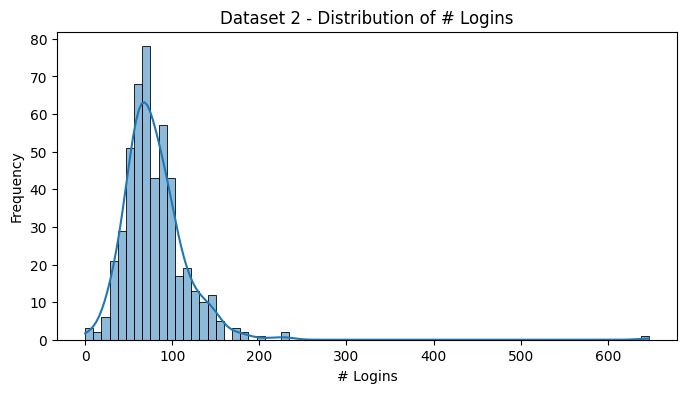

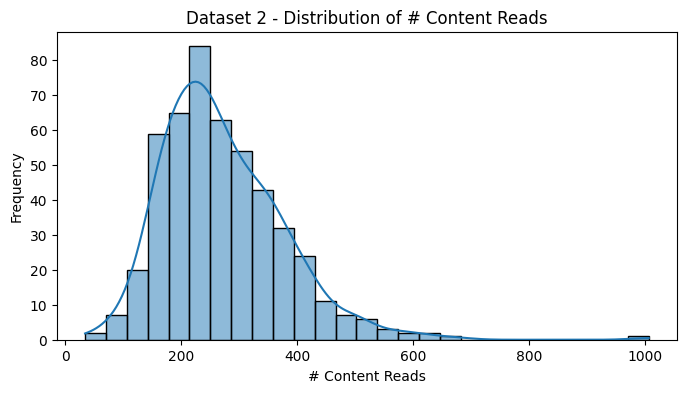

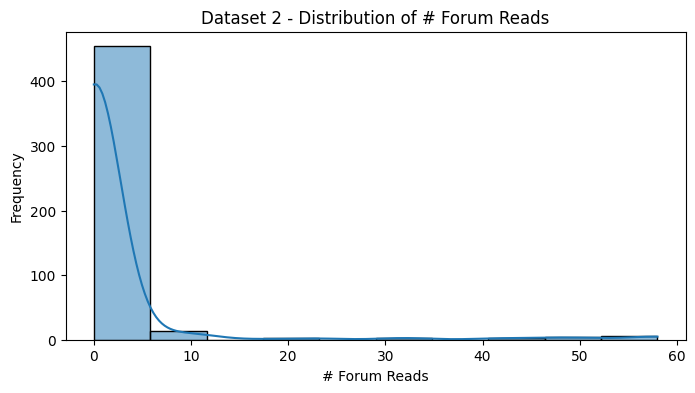

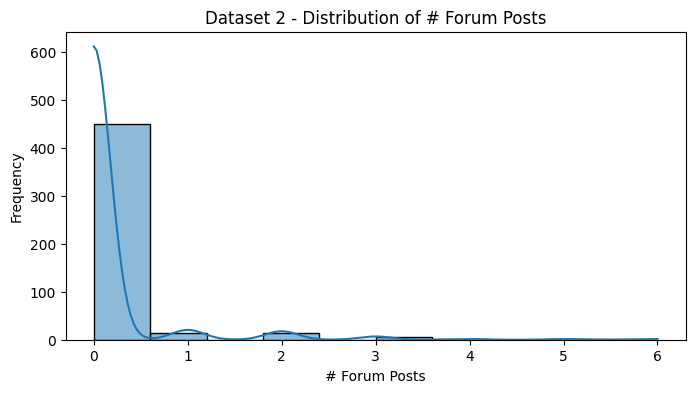

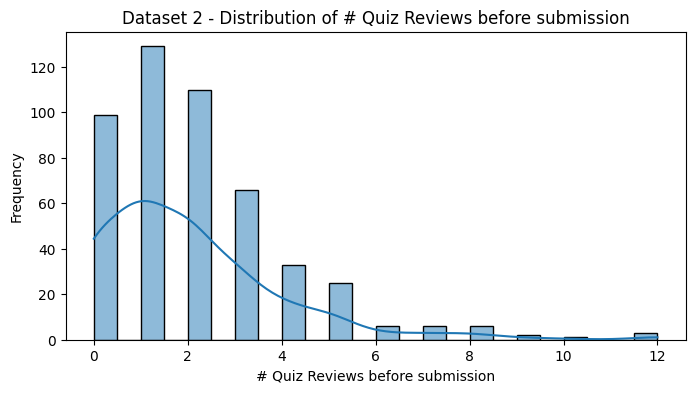

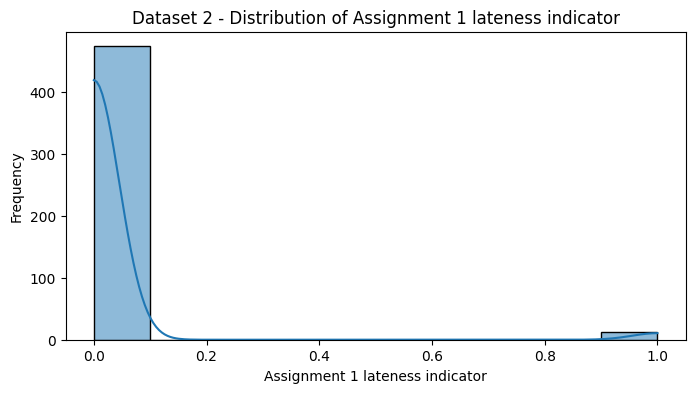

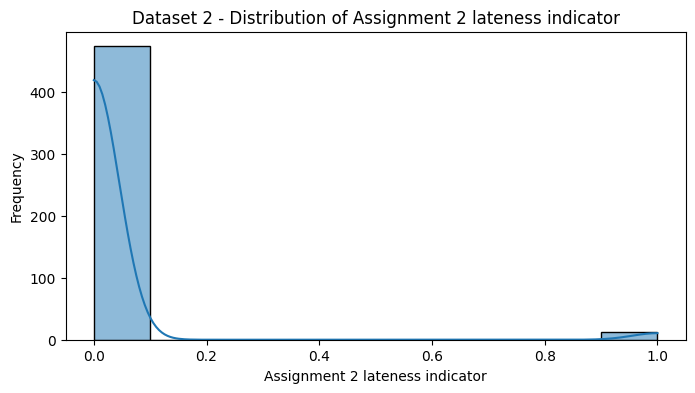

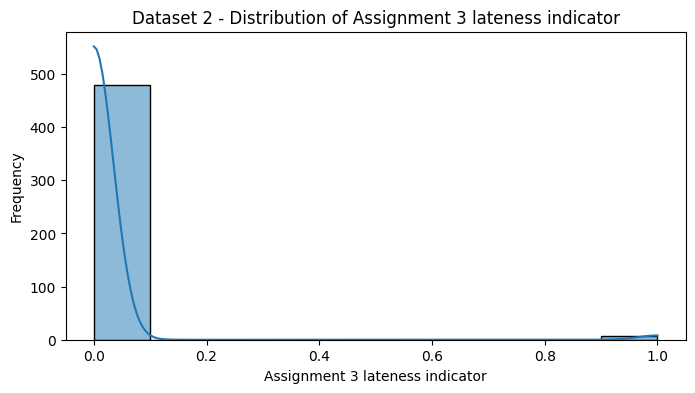

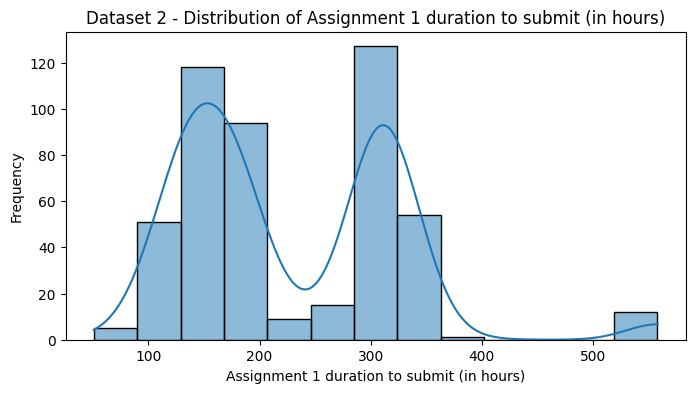

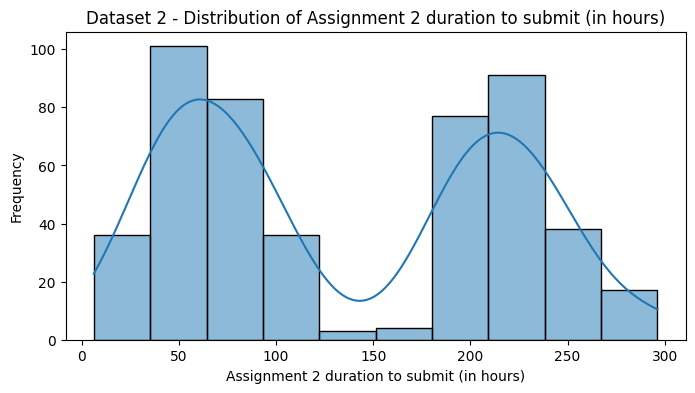

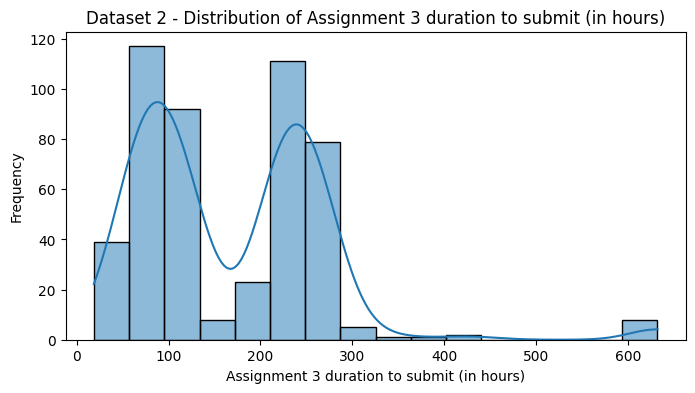

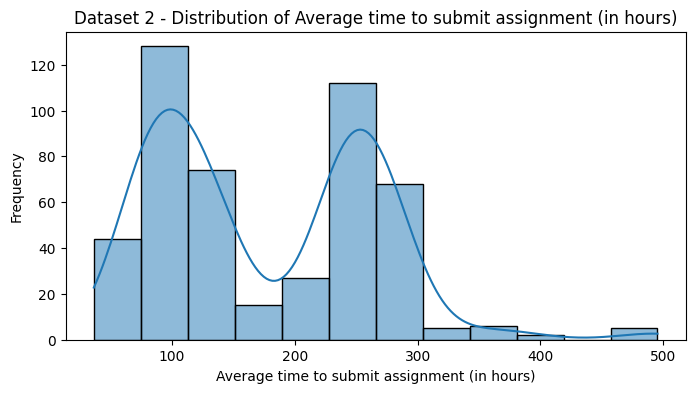

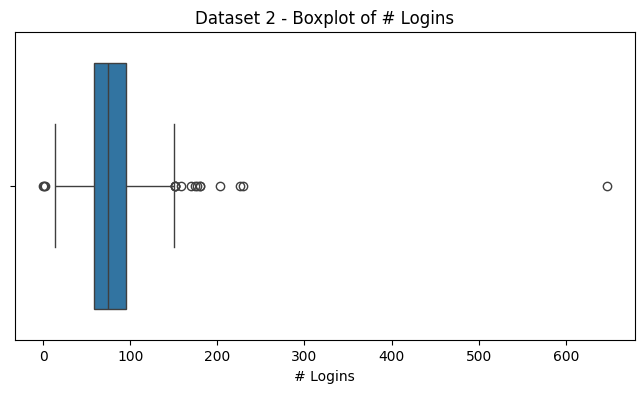

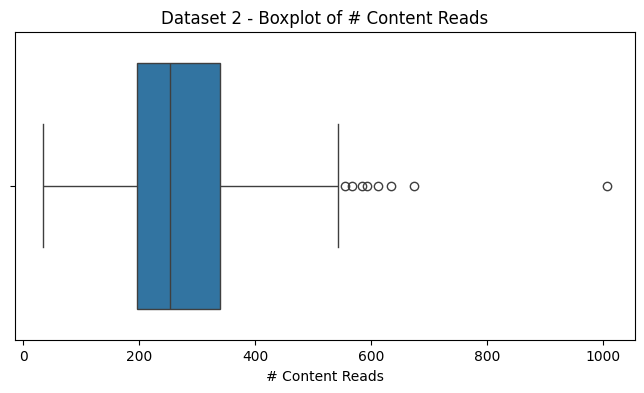

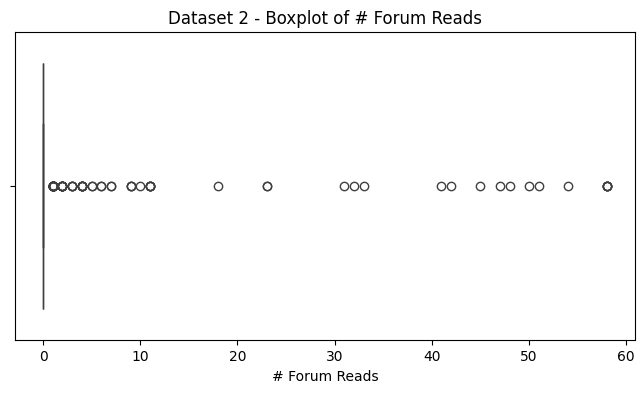

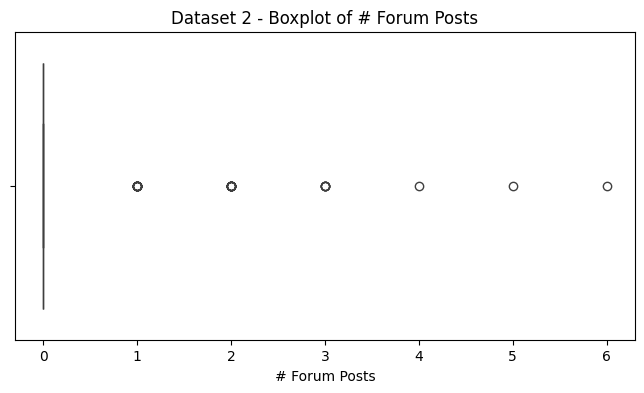

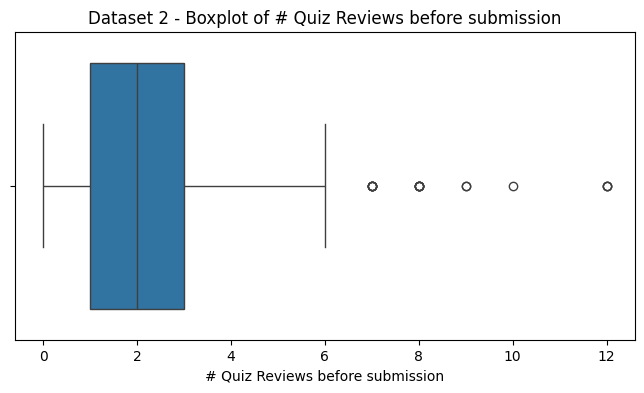

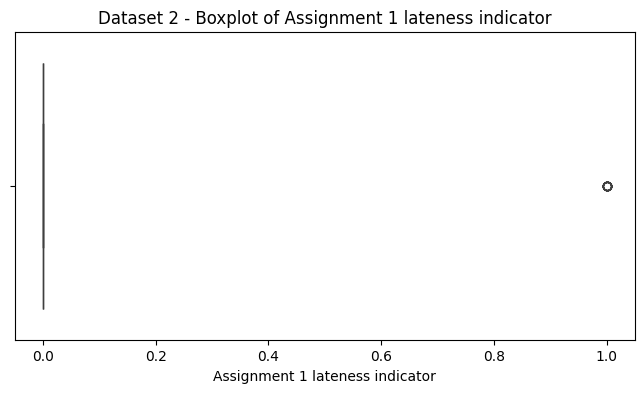

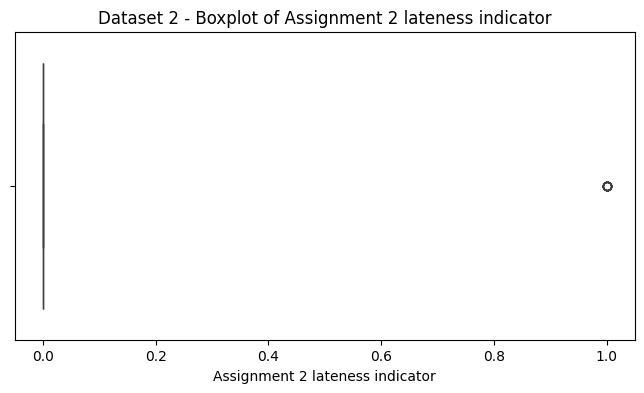

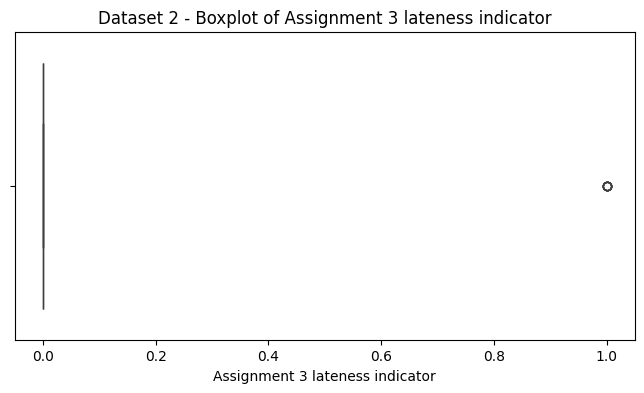

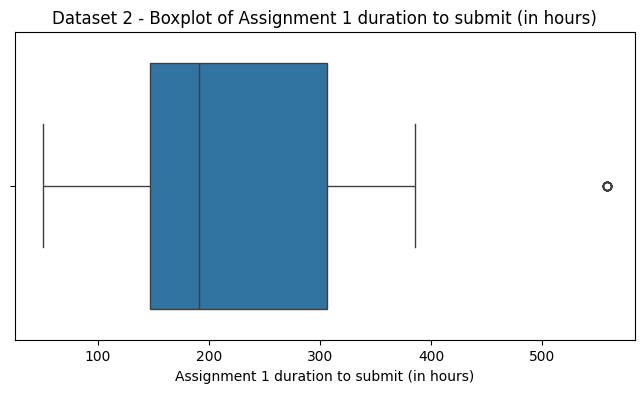

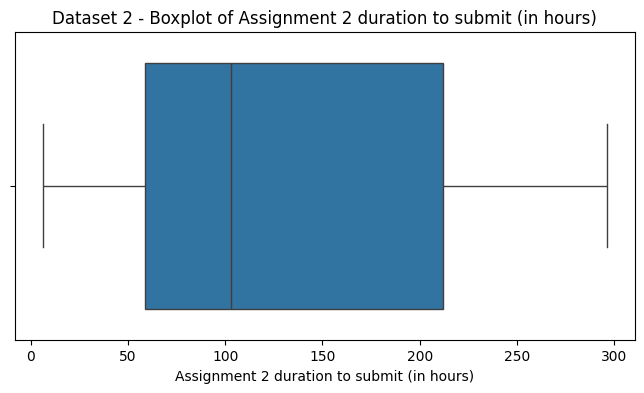

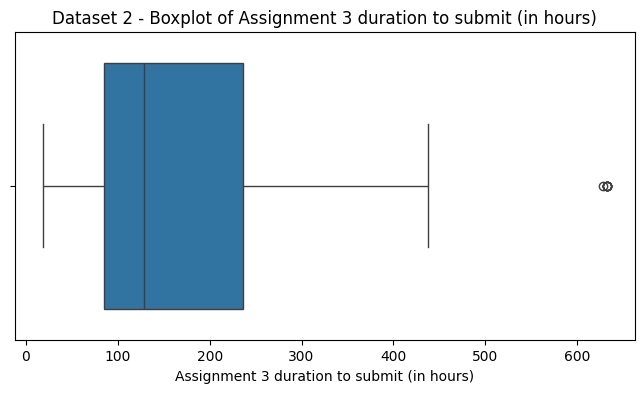

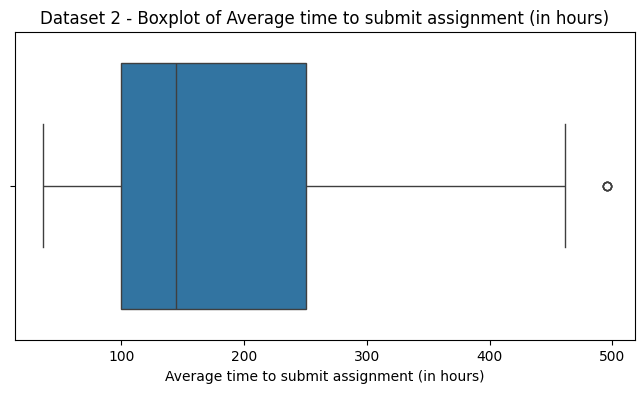

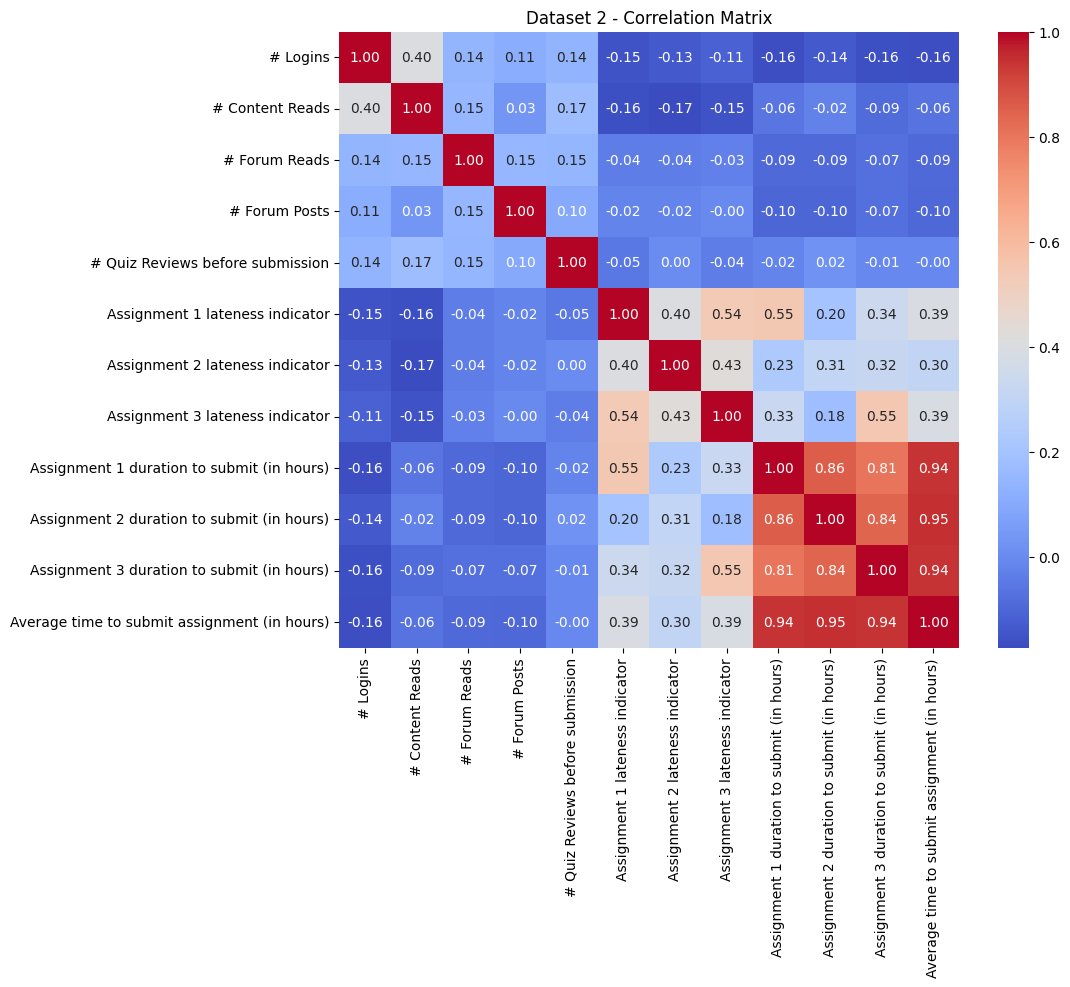

Visualizing Dataset 3...


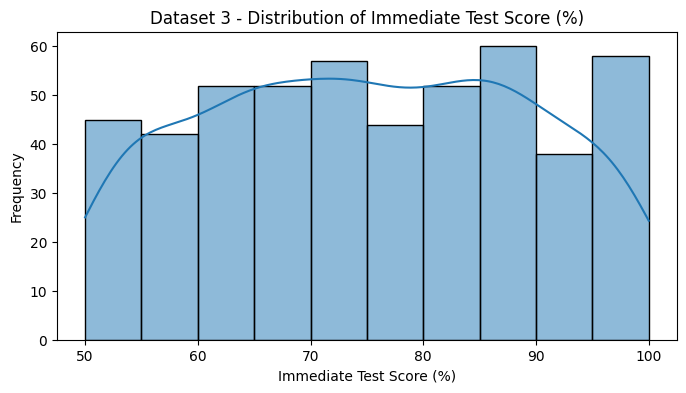

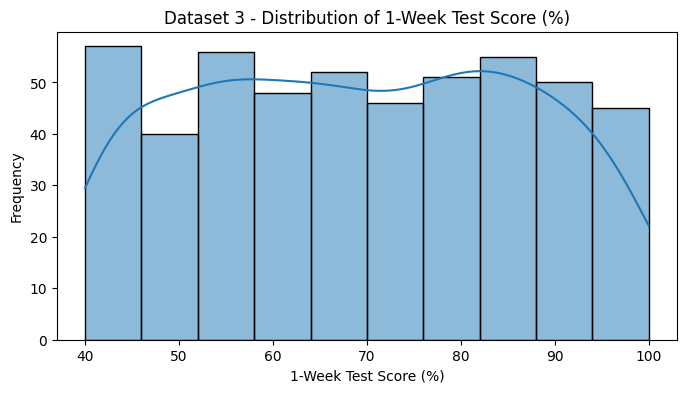

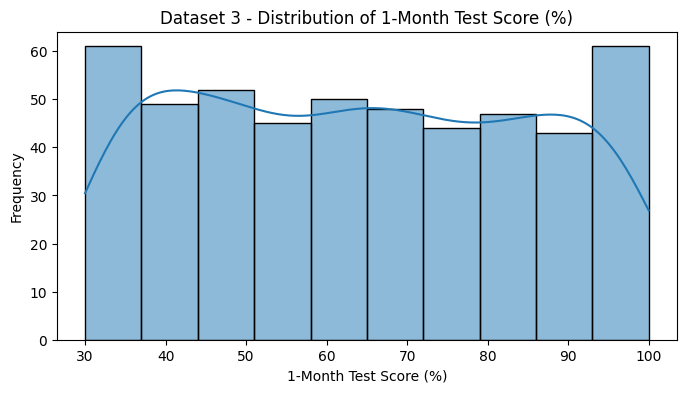

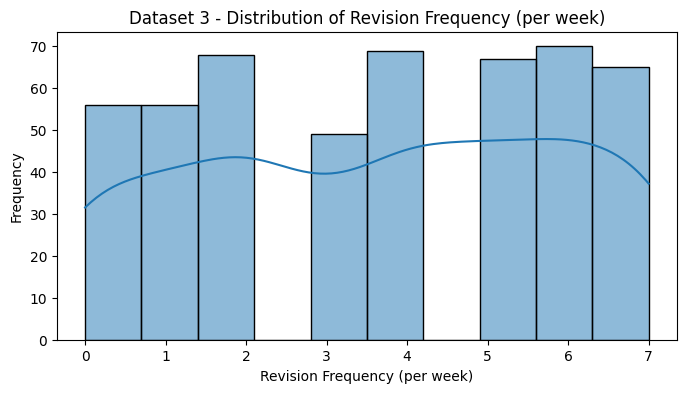

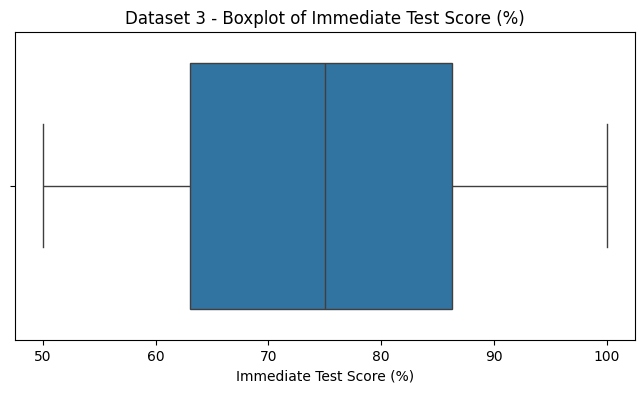

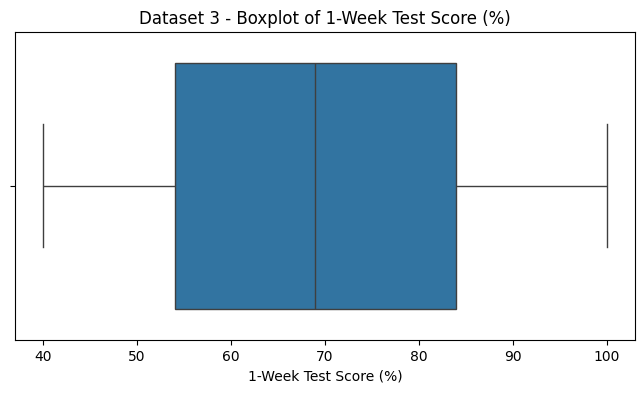

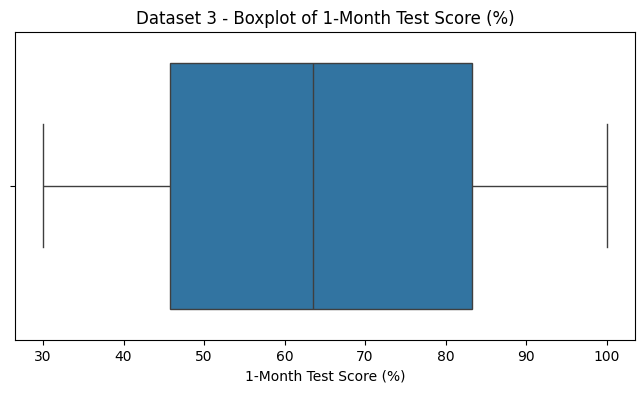

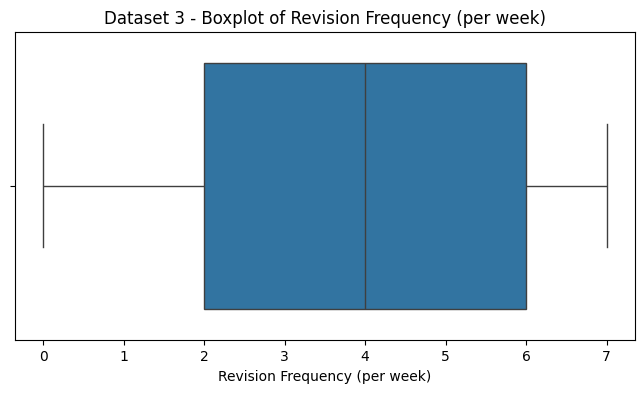

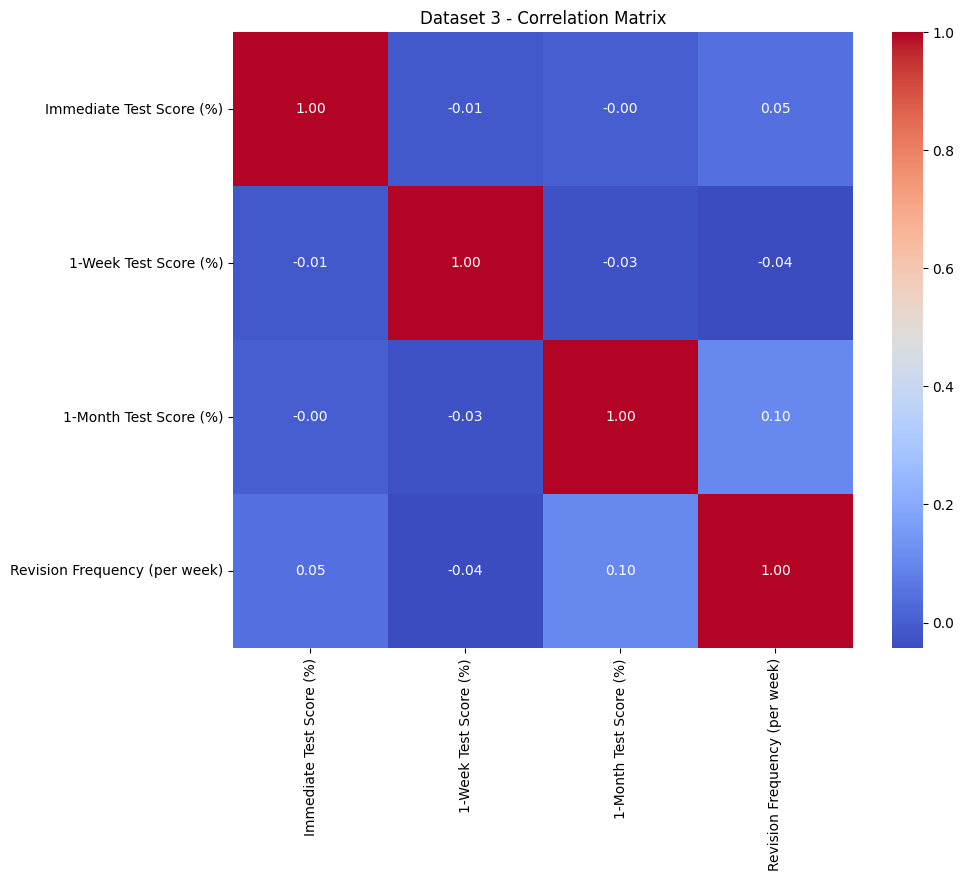

Visualizing Dataset 4...


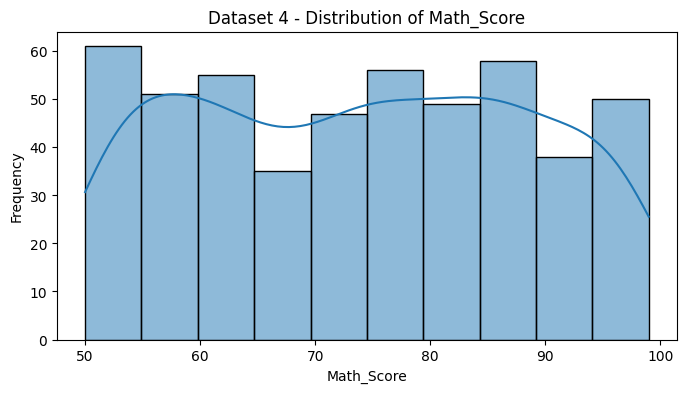

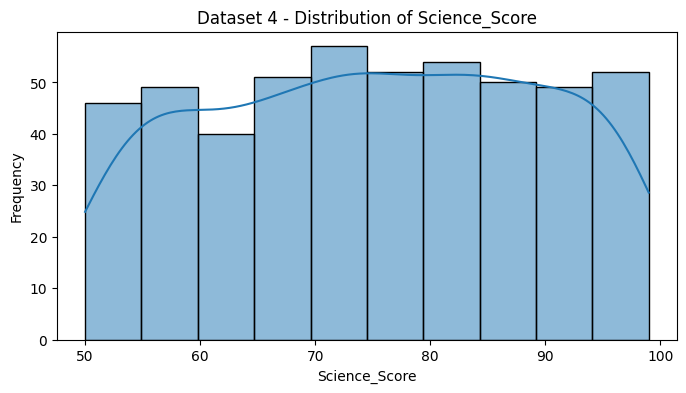

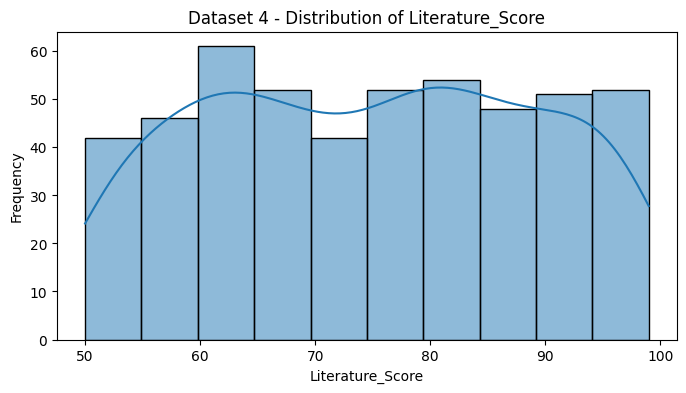

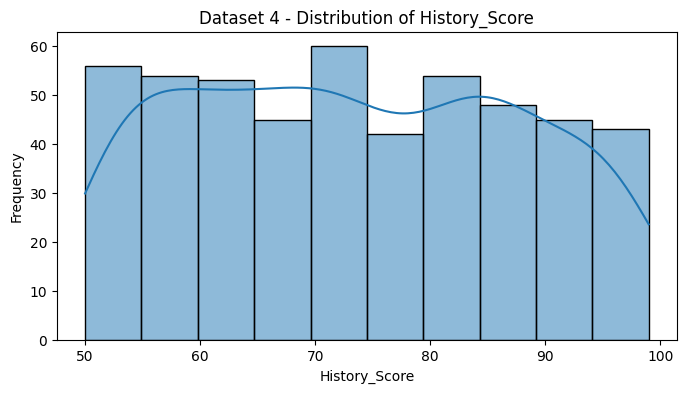

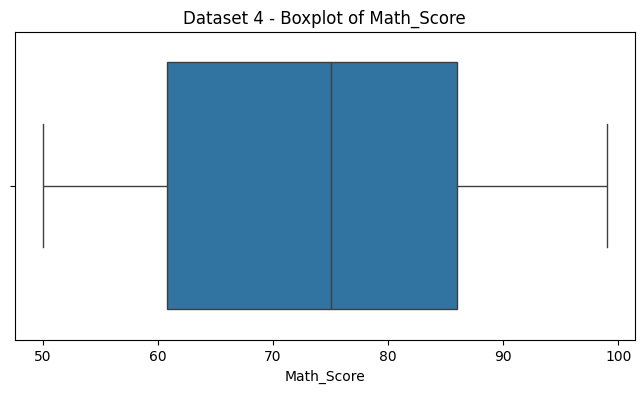

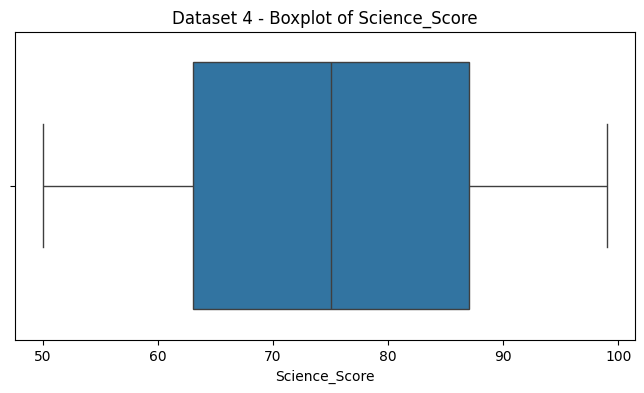

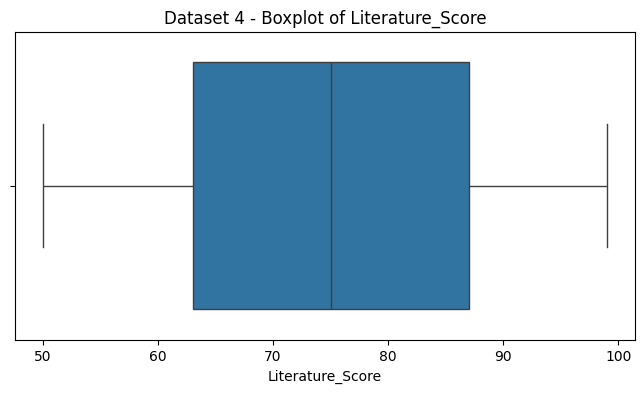

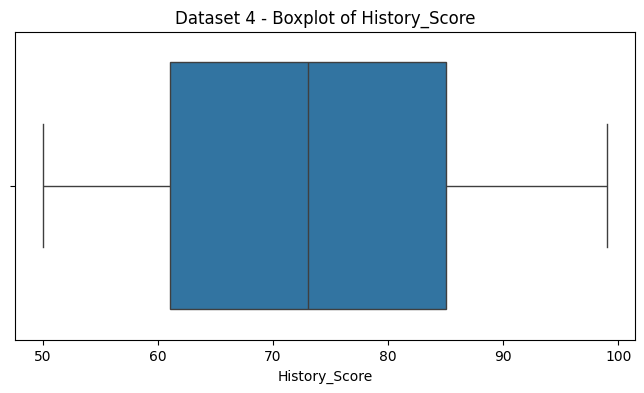

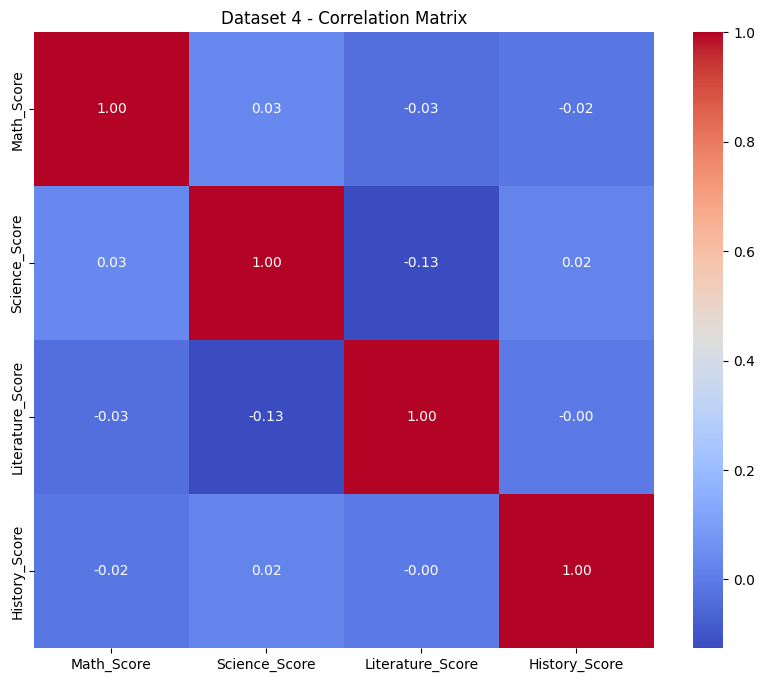

Visualizing Dataset 5...


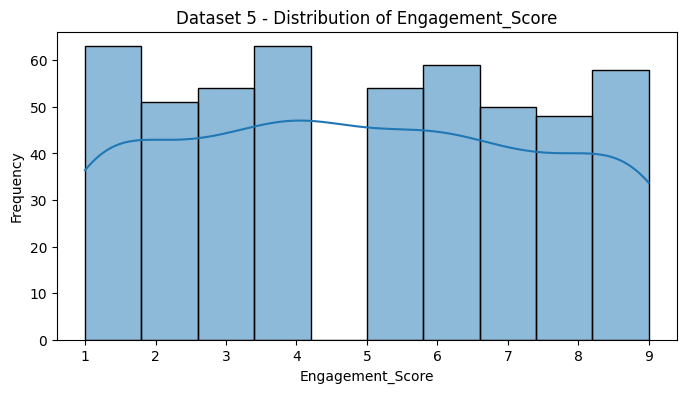

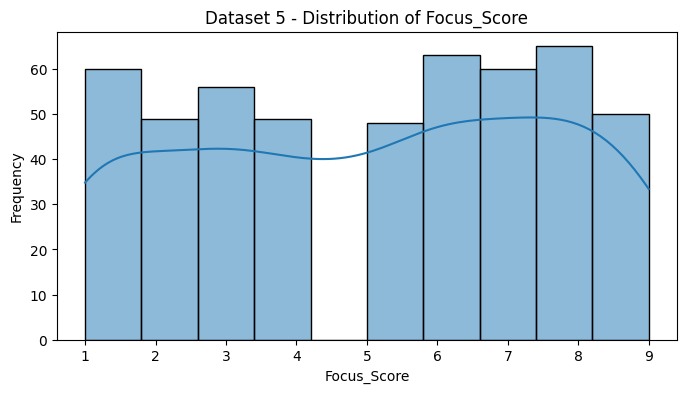

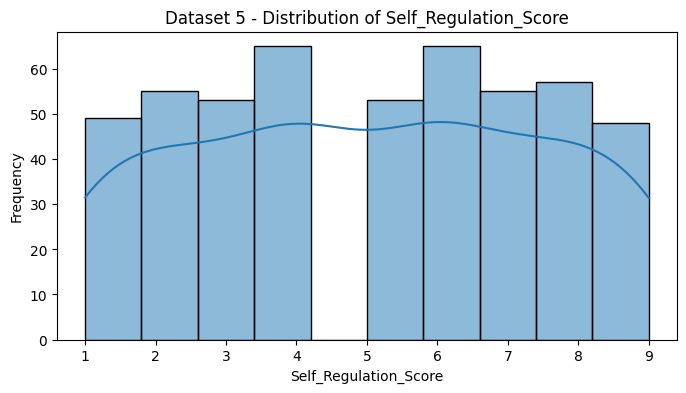

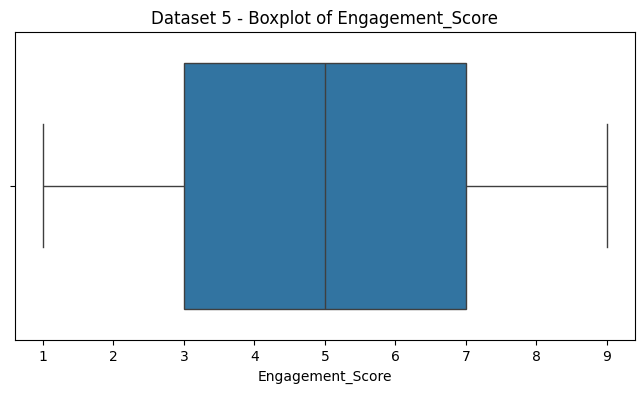

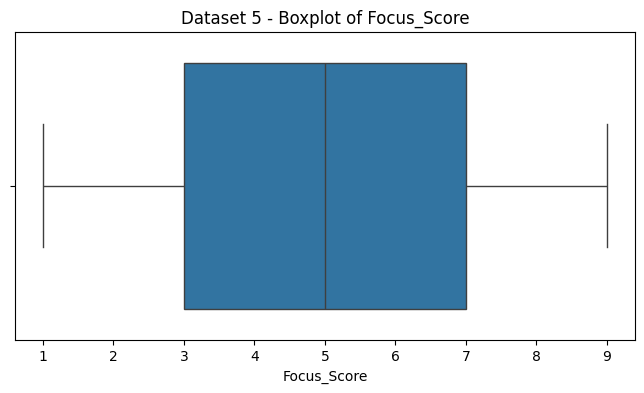

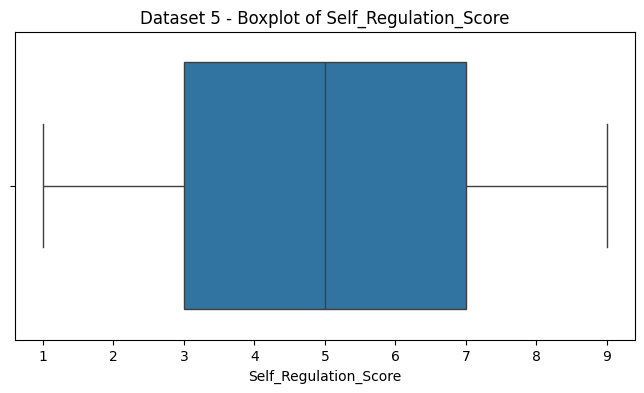

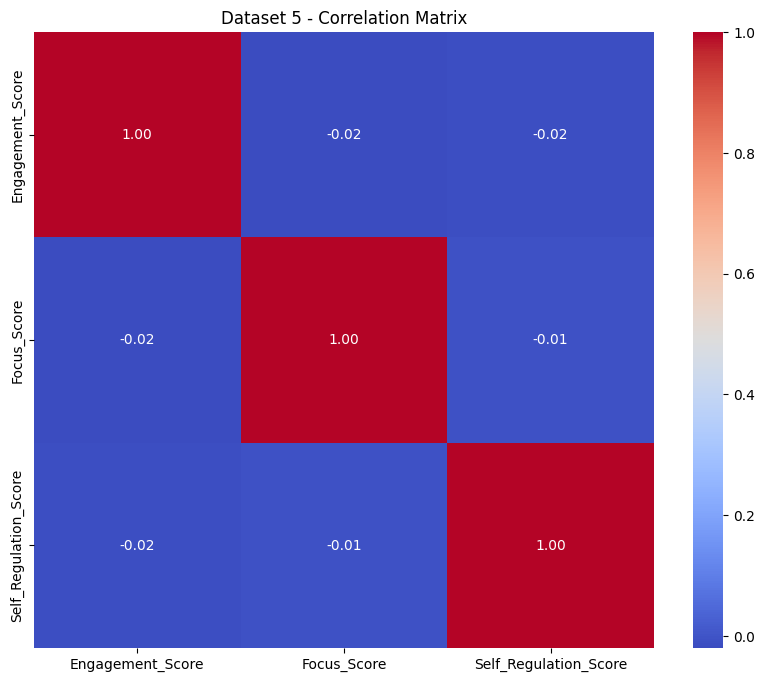

Visualizing Dataset 6...


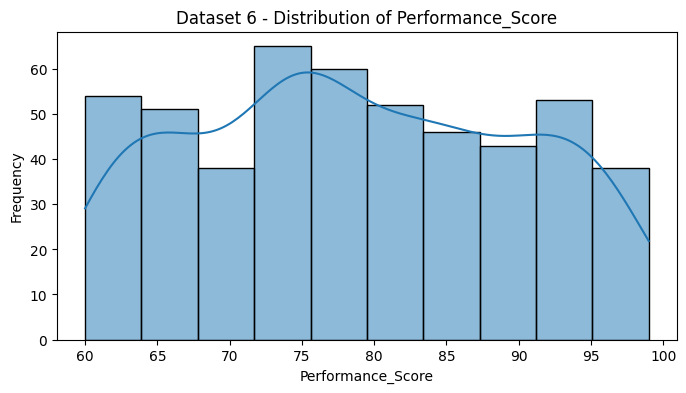

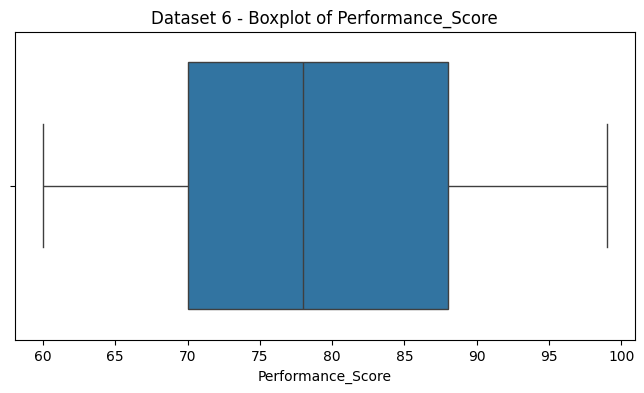

In [ ]:
#Visualization (Distributions,box plots, and correlation matrix)

# Function to plot distribution, boxplot, and correlation matrix for a dataset
def visualize_data(dataset, dataset_name):
    print(f"Visualizing {dataset_name}...")

    # Filter numeric columns
    numeric_columns = dataset.select_dtypes(include=['number']).columns

    # Plot distributions
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(dataset[column], kde=True)
        plt.title(f"{dataset_name} - Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    # Plot boxplots
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=dataset[column])
        plt.title(f"{dataset_name} - Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

    # Plot correlation matrix if numeric columns exist
    if len(numeric_columns) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = dataset[numeric_columns].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"{dataset_name} - Correlation Matrix")
        plt.show()

# Visualize each dataset
visualize_data(dataset1, "Dataset 1")
visualize_data(dataset2, "Dataset 2")
visualize_data(dataset3, "Dataset 3")
visualize_data(dataset4, "Dataset 4")
visualize_data(dataset5, "Dataset 5")
visualize_data(dataset6, "Dataset 6")


6- Prepare data for training

In [ ]:
# Updated Encoding Code with Behavior_Type for Dataset 5

from sklearn.preprocessing import LabelEncoder

# Encoding function
def encode_columns(dataset, columns_to_encode):
    print("\nEncoding dataset...")
    for column in columns_to_encode:
        if column in dataset.columns:
            print(f"Encoding column: {column}")
            le = LabelEncoder()
            dataset[column] = le.fit_transform(dataset[column].astype(str))
        else:
            print(f"Column '{column}' not found. Skipping encoding.")
    print("\nDataset after encoding:")
    print(dataset.head(10))  # Display the first few rows after encoding
    return dataset

# Apply Encoding

# Learning Preferences Dataset
learning_pref_columns_to_encode = ['Visual Learner (Y/N)', 'Auditory Learner (Y/N)',
                                   'Kinesthetic Learner (Y/N)', 'Read/Write Learner (Y/N)', 'Preferred Materials']
dataset1 = encode_columns(dataset1, learning_pref_columns_to_encode)

# Engagement and Behavior Dataset
engagement_columns_to_encode = ['Engagement Level']
dataset2 = encode_columns(dataset2, engagement_columns_to_encode)

# Retention and Study Habits Dataset
retention_columns_to_encode = ['Retention Type']
dataset3 = encode_columns(dataset3, retention_columns_to_encode)

# Academic Performance Dataset
academic_columns_to_encode = ['Overall_Performance', 'Preference']
dataset4 = encode_columns(dataset4, academic_columns_to_encode)

# Assignment Metrics Dataset
assignment_columns_to_encode = ['Assignment 1 lateness indicator', 'Assignment 2 lateness indicator',
                                 'Assignment 3 lateness indicator']
dataset2 = encode_columns(dataset2, assignment_columns_to_encode)

# Behavior and Scores Dataset (Dataset 5 with `Behavior_Type` fix)
dataset5_columns_to_encode = ['Behavior_Type']
dataset5 = encode_columns(dataset5, dataset5_columns_to_encode)

# Learning Environment Dataset
learning_env_columns_to_encode = ['Learning_Environment', 'Preference_Level']
dataset6 = encode_columns(dataset6, learning_env_columns_to_encode)



Encoding dataset...
Encoding column: Visual Learner (Y/N)
Encoding column: Auditory Learner (Y/N)
Encoding column: Kinesthetic Learner (Y/N)
Encoding column: Read/Write Learner (Y/N)
Encoding column: Preferred Materials

Dataset after encoding:
  Student ID  Visual Learner (Y/N)  Auditory Learner (Y/N)  \
0       S001                     1                       1   
1       S002                     1                       1   
2       S003                     1                       1   
3       S004                     1                       1   
4       S005                     1                       0   
5       S006                     0                       0   
6       S007                     0                       0   
7       S008                     0                       0   
8       S009                     0                       1   
9       S010                     0                       0   

   Kinesthetic Learner (Y/N)  Read/Write Learner (Y/N)  Preferred Mater

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

def normalize_all_columns(dataset):
    """
    Normalizes all numeric columns in the dataset using MinMaxScaler.
    Returns the normalized dataset and saves the scaler to 'scaler.pkl'.
    """
    print("\nNormalizing dataset...")
    scaler = MinMaxScaler()
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns  # Select all numeric columns

    if len(numeric_columns) > 0:
        print("Before Normalization, dataset headers:")
        print(list(dataset.columns))

        # Handle missing values before normalization
        dataset[numeric_columns] = dataset[numeric_columns].fillna(0)

        # Normalize the numeric columns
        before_normalization = dataset[numeric_columns].copy()
        scaled_data = scaler.fit_transform(dataset[numeric_columns])

        # Convert scaled_data back to DataFrame to preserve column names and index
        scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns, index=dataset.index)

        # Assign back to dataset
        dataset[numeric_columns] = scaled_df

        # Print before-and-after normalization details
        print("\nBefore Normalization (sample):")
        print(before_normalization.head())
        print("\nAfter Normalization (sample):")
        print(dataset[numeric_columns].head())

        print("After Normalization, dataset headers:")
        print(list(dataset.columns))
    else:
        print("No numeric columns found for normalization.")

    # Save the scaler after fitting
    joblib.dump(scaler, 'scaler.pkl')  # <-- Saving the scaler

    return dataset




# Apply Normalization to Each Dataset

print("\n--- Normalizing Dataset 1: Learning Preferences ---")
dataset1 = normalize_all_columns(dataset1)

print("\n--- Normalizing Dataset 2: Engagement and Behavior ---")
dataset2 = normalize_all_columns(dataset2)

print("\n--- Normalizing Dataset 3: Retention and Study Habits ---")
dataset3 = normalize_all_columns(dataset3)

print("\n--- Normalizing Dataset 4: Academic Performance ---")
dataset4 = normalize_all_columns(dataset4)

print("\n--- Normalizing Dataset 5: Behavior and Scores ---")
dataset5 = normalize_all_columns(dataset5)

print("\n--- Normalizing Dataset 6: Learning Environment ---")
dataset6 = normalize_all_columns(dataset6)

# Display Final Processed Datasets
print("\nFinal Processed Dataset 1 (Sample):")
print(dataset1.head())

print("\nFinal Processed Dataset 2 (Sample):")
print(dataset2.head())

print("\nFinal Processed Dataset 3 (Sample):")
print(dataset3.head())

print("\nFinal Processed Dataset 4 (Sample):")
print(dataset4.head())

print("\nFinal Processed Dataset 5 (Sample):")
print(dataset5.head())

print("\nFinal Processed Dataset 6 (Sample):")
print(dataset6.head())



--- Normalizing Dataset 1: Learning Preferences ---

Normalizing dataset...
Before Normalization, dataset headers:
['Student ID', 'Visual Learner (Y/N)', 'Auditory Learner (Y/N)', 'Kinesthetic Learner (Y/N)', 'Read/Write Learner (Y/N)', 'Preferred Materials']

Before Normalization (sample):
   Visual Learner (Y/N)  Auditory Learner (Y/N)  Kinesthetic Learner (Y/N)  \
0                     1                       1                          0   
1                     1                       1                          0   
2                     1                       1                          1   
3                     1                       1                          1   
4                     1                       0                          0   

   Read/Write Learner (Y/N)  Preferred Materials  
0                         0                    2  
1                         0                    1  
2                         0                    3  
3                         1       

In [ ]:
import pandas as pd

def combine_datasets_as_whole(datasets):
    """
    Combines datasets as a whole by concatenating them column-wise.
    Ensures all data is numeric and handles missing values.

    Args:
        datasets: List of datasets to combine.

    Returns:
        Combined dataset.
    """
    # Concatenate datasets column-wise
    combined_dataset = pd.concat(datasets, axis=1, ignore_index=False)

    # Ensure all data is numeric
    combined_dataset = combined_dataset.apply(pd.to_numeric, errors='coerce')

    # Handle missing values (replace NaN with 0)
    if combined_dataset.isnull().values.any():
        print("Warning: Missing values found in the combined dataset. Filling with 0.")
        combined_dataset.fillna(0, inplace=True)

    # Validate combined dataset
    print("\nFinal Combined Dataset Columns:")
    print(list(combined_dataset.columns))
    print(f"\nCombined Dataset Shape: {combined_dataset.shape}")
    return combined_dataset

# Combine datasets for Neural Network
processed_datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]
final_dataset = combine_datasets_as_whole(processed_datasets)

# Validate the Final Dataset
print("\nFinal Combined Dataset Shape:", final_dataset.shape)
print(final_dataset.head())



Final Combined Dataset Columns:
['Student ID', 'Visual Learner (Y/N)', 'Auditory Learner (Y/N)', 'Kinesthetic Learner (Y/N)', 'Read/Write Learner (Y/N)', 'Preferred Materials', 'Student ID', '# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission', 'Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator', 'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)', 'Engagement Level', 'Student ID', 'Retention Type', 'Immediate Test Score (%)', '1-Week Test Score (%)', '1-Month Test Score (%)', 'Revision Frequency (per week)', 'Student_ID', 'Preference', 'Math_Score', 'Science_Score', 'Literature_Score', 'History_Score', 'Overall_Performance', 'Student_ID', 'Behavior_Type', 'Engagement_Score', 'Focus_Score', 'Self_Regulation_Score', 'Student_ID', 'Learning_Environment', 'Per

C- Model (Neural Network)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3638 - val_loss: 2.1994
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1864 - val_loss: 2.0846
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7190 - val_loss: 1.9841
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4817 - val_loss: 1.8928
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3287 - val_loss: 1.8089
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2345 - val_loss: 1.7334
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1885 - val_loss: 1.6653
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1468 - val_loss: 1.6041
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1285 - val_loss: 1.5413
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1086 - val_loss: 1.4794
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0920 - val_loss: 1.4217
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0808 - val_loss: 1.369

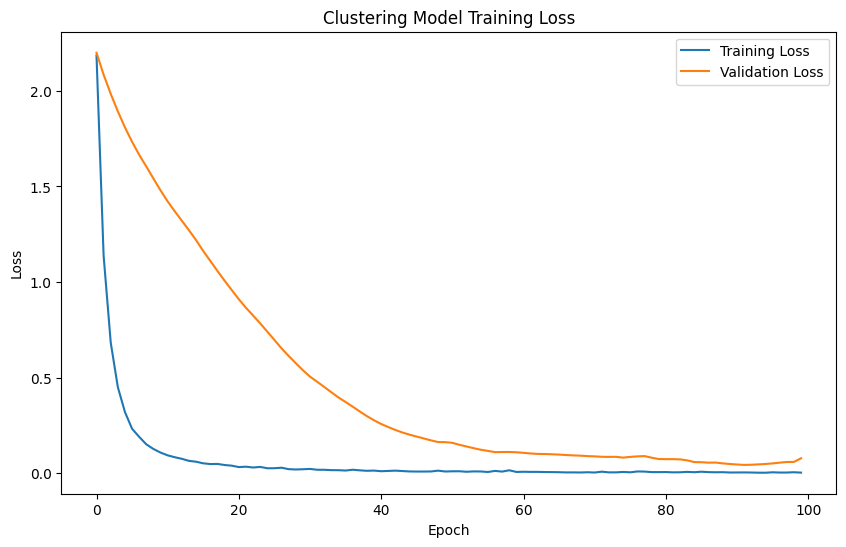

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Silhouette Score: 0.2634
Model loaded successfully from .keras format!
Encoder loaded successfully!
Scaler loaded successfully!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import joblib

# Preprocess the dataset with MinMaxScaler
scaler = MinMaxScaler()
features_combined = scaler.fit_transform(final_dataset.values.astype(np.float32))

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Model Initialization
input_dim = features_combined.shape[1]
n_clusters = 10  # Number of clusters

# Build Clustering Neural Network
def build_clustering_nn(input_dim, n_clusters=10):
    """
    Builds and compiles a clustering model with softmax-based output.
    """
    input_layer = Input(shape=(input_dim,))  # Use shape for compatibility
    x = Dense(256)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Dense(128, name='latent_layer')(x)  # Named the latent layer
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    output_layer = Dense(n_clusters, activation='softmax')(x)  # Cluster probabilities
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')  # Clustering loss
    return model

# Create and compile the clustering model
clustering_nn = build_clustering_nn(input_dim, n_clusters)

# Perform PCA for initial feature reduction
pca = PCA(n_components=42)
latent_features_pretrain = pca.fit_transform(features_combined)

# Perform K-Means for initial clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
initial_clusters = kmeans.fit_predict(latent_features_pretrain)

# Convert initial clusters to one-hot encoded pseudo-targets
pseudo_targets = np.eye(n_clusters)[initial_clusters]

# Train the clustering neural network
history = clustering_nn.fit(
    features_combined,
    pseudo_targets,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1
)

# Plot training loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Clustering Model Training Loss')
plt.legend()
plt.show()

# Extract the latent features using the encoder
clustering_encoder = Model(
    inputs=clustering_nn.input,
    outputs=clustering_nn.get_layer('latent_layer').output
)
latent_features = clustering_encoder.predict(features_combined)

# Final clustering with K-Means
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(latent_features)

# Evaluate clustering performance
silhouette_avg = silhouette_score(latent_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Save models
clustering_nn.save('clustering_nn.keras')  # Save in .keras format
clustering_nn.save('clustering_nn.h5')  # Save in .h5 format
clustering_encoder.save('clustering_encoder.keras')  # Save encoder in .keras format
joblib.dump(kmeans_final, 'kmeans_model.pkl')  # Save the final K-Means model

# Test loading the .keras format
try:
    loaded_nn = load_model('clustering_nn.keras')
    print("Model loaded successfully from .keras format!")
except Exception as e:
    print(f"Error loading model from .keras format: {e}")

# Test loading the encoder model
try:
    loaded_encoder = load_model('clustering_encoder.keras')
    print("Encoder loaded successfully!")
except Exception as e:
    print(f"Error loading encoder: {e}")

# Test loading the scaler
try:
    loaded_scaler = joblib.load('scaler.pkl')
    print("Scaler loaded successfully!")
except Exception as e:
    print(f"Error loading scaler: {e}")


In [ ]:
# Print the shape of final_dataset
print("Final Dataset Shape:", final_dataset.shape)

# Print the column names and their order
print("\nFinal Dataset Columns:")
print(final_dataset.columns.tolist())

# Print the first few rows to see sample data
print("\nFirst few rows of final_dataset:")
print(final_dataset.head())

# Print the data types of each column
print("\nData types of each column:")
print(final_dataset.dtypes)


Final Dataset Shape: (500, 42)

Final Dataset Columns:
['Student ID', 'Visual Learner (Y/N)', 'Auditory Learner (Y/N)', 'Kinesthetic Learner (Y/N)', 'Read/Write Learner (Y/N)', 'Preferred Materials', 'Student ID', '# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission', 'Assignment 1 lateness indicator', 'Assignment 2 lateness indicator', 'Assignment 3 lateness indicator', 'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)', 'Engagement Level', 'Student ID', 'Retention Type', 'Immediate Test Score (%)', '1-Week Test Score (%)', '1-Month Test Score (%)', 'Revision Frequency (per week)', 'Student_ID', 'Preference', 'Math_Score', 'Science_Score', 'Literature_Score', 'History_Score', 'Overall_Performance', 'Student_ID', 'Behavior_Type', 'Engagement_Score', 'Focus_Score', 'Self_Regulation_Score', 'Student_ID', 'Learn

In [ ]:
pip install groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install transformers datasets torch scikit-learn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [ ]:

!pip install streamlit

!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

34.81.57.235


⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.57.235:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://bitter-lies-share.loca.lt
2024-12-12 23:20:05.160460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 23:20:05.191893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 23:20:05.201372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 23:20:06.666640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Ten